# Assignment 6
## Problem 1

#### part a
||0| 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|---|---|---|---|---|---|---|---|---|
|A|<ins>0</ins>|0|0|0|0|0|0|0|
|B|$\infty$|<ins>1</ins>,A|1,A|1,A|1,A|1,A|1,A|1,A|
|C|$\infty$|$\infty$|<ins>3</ins>,B|3,B|3,B|3,B|3,B|3,B|
|D|$\infty$|$\infty$|$\infty$|<ins>4</ins>,C|4,C|4,C|4,C|4,C|
|E|$\infty$|4,A|4,A|4,A|<ins>4</ins>,A|4,A|4,A|4,A|4,A|4,A|4,A|
|F|$\infty$|8,A|7,B|7,B|7,B|7,B|<ins>6</ins>,G|6,G|
|G|$\infty$|$\infty$|7,B|5,C|5,C|<ins>5</ins>,C|5,C|5,C|
|H|$\infty$|$\infty$|$\infty$|$\infty$|8,D|8,D|6,G|<ins>6</ins>,G|

#### part b
![img](IMG_0226.png)

## Problem 2
The general approach for the problem will be to first traverse the matrix, and represent it as an undirected graph in which each tile is a vertex, and there is an edge between vertices if those two vertices represent adjacent land tiles. Once we have this representation, we simply have to perform depth first search and keep track of how many distinct connected components of the graph there are (excluding the water tiles). The graph will obvioulsy not necessarily be connected. Depth first search will explore all connected nodes given a start node. We simply need to count how many times this explore function is called on a land tile before all nodes are explored.

In [32]:
# I coded it for some reason - not worth the effort tbh
class FindIslands:
    def __init__(self,M):
        # first convert the matrix M into an adjecency list
        # assumes M is a square
        self.M = M
        self.dim = len(M)
        self.adj_list = [[] for _ in range(self.dim**2)]
        self.build_graph()
        self.visited = {}
        print(self.dfs())
  
    # given square matrix M, (0 = water, land = 1) convert it into an adjacency list
    def build_graph(self):
        for v in range((self.dim)**2):
            if self.M[v//self.dim][v%self.dim] == 1: #check that current tile is land
                if (v%self.dim != self.dim-1) and self.M[v//self.dim][v%self.dim + 1] == 1: #check tile to the right of current
                    self.adj_list[v].append(v+1) #graph is undirected so add connection for both tiles
                    self.adj_list[v+1].append(v)
                if (v//self.dim != self.dim-1) and M[v//self.dim + 1][v%self.dim] == 1: #check tile underneath the current
                    self.adj_list[v].append(v+self.dim) #graph is undirected so add connection for both tiles
                    self.adj_list[v+self.dim].append(v)
        
    def explore(self,v):
        #mark node as visited
        self.visited[v] = 0
        for u in self.adj_list[v]:
            if u not in self.visited:
                self.explore(u)

    def dfs(self):
        # now that we have adjacency list perform DFS
        island_count = 0
        for v in range(self.dim**2):
            if v not in self.visited and self.M[v//self.dim][v%self.dim] == 1: #only need to explore a tile if it is a land tile and hasn't been explored already
                self.explore(v)
                island_count += 1
        return island_count
    

In [33]:
M = [
[0,1,1,0,0],
[1,1,0,1,1],
[1,0,1,0,1],
[0,1,0,0,1],
[1,1,0,0,0]    
] #example matrix
prob = FindIslands(M) #looks like it works

4


## Problem 3

Idea is to BFS until you find the destination square.

In [34]:
#part a
import numpy as np
def valid_moves(pos,n):
    moves = {'ul':np.array([-1,2]),
             'ur':np.array([1,2]),
             'ru':np.array([2,1]),
             'rd':np.array([2,-1]),
             'dl':np.array([-1,-2]),
             'dr':np.array([1,-2]),
             'lu':np.array([-2,1]),
             'ld':np.array([-2,-1])}
    for key in moves:
        moves[key] += np.array(pos)
        if moves[key][0] < 0 or moves[key][1] < 0 or moves[key][0] > n-1 or moves[key][1] > n-1:
            moves[key] = None
    return moves
def chess_moves(start,dest,n):
    dist_list = {start:(0,None)}
    queue = []
    queue.append(start)
    while len(queue) != 0:
        pos = queue.pop(0)
        moves = valid_moves(pos,n)
        for key in moves:
            try:
                if moves[key] == None:
                    continue
            except:
                move = tuple(moves[key])
                if move not in dist_list:
                    dist_list[move] = (dist_list[pos][0] + 1,pos,key)
                    queue.append(move)
                    if move == dest:
                        break
    
    move_sequence = []
    curr = dest
    while dist_list[curr][1] != None:
        move_sequence.insert(0,dist_list[curr][2])
        curr = dist_list[curr][1]
    return dist_list[dest][0],move_sequence



In [35]:
print(chess_moves((0,0),(7,7),8))
# looks like it works. Interesting that the path goes along the edge of the board.

(6, ['ur', 'ul', 'ur', 'ru', 'rd', 'ru'])


#### part b
The runtime of the algorithm is linear because this is just breadth first search which is $O(|v|+|e|)$. This algorithm is actually slightly faster however because it can stop once you arrive at the destination. This means that not all vertices are necessarily explored. Nonetheless, the algorithm is at worst $O(|v|+|e|)$. The number of vertices is dependent on n: the dimension of the board. $|v| = n^2$ because |v| just represents the number of board tiles. For every vertex there is at most 8 edges from that vertex because a knight can only have at most 8 legal moves (less if it is near the edge of the board), so $|e| < 8|v| = 8n^2$. We can then say that $O(|v|+|e|) = O(n^2+8n^2) = O(n^2)$

## Problem 4

In [36]:
class PriorityQueue:
    def __init__(self,mode = 'max'):
        self.mode = mode
        self.collection = []
        self.size = 0
        self.data_locations = {}
    def __right(self,i):
        return 2*i+1
    def __left(self,i):
        return 2*i+2
    def __parent(self,i):
        return (i-1)//2
    def __sift_down(self,i):
        l, r = self.__left(i),self.__right(i)
        if l < len(self.collection) and self.collection[l][1] > self.collection[i][1]:
            largest = l
        else: largest = i
        if r < len(self.collection) and self.collection[r][1] > self.collection[largest][1]:
            largest = r
        if largest != i:
            self.data_locations[self.collection[i][0]], self.data_locations[self.collection[largest][0]]  = largest, i
            self.collection[i],self.collection[largest] = self.collection[largest],self.collection[i]
            self.__sift_down(largest)

    def __bubble_up(self,i):
        p = self.__parent(i)
        if p == -1:
            return
        if self.collection[p][1] < self.collection[i][1]:
            self.data_locations[self.collection[p][0]], self.data_locations[self.collection[i][0]]  = i, p
            self.collection[p],self.collection[i] = self.collection[i],self.collection[p]
            self.__bubble_up(p)
        else:
            return
        
    def enqueue(self,task,priority):
        if self.mode == 'min':
            priority *= -1
        self.collection.append((task,priority))
        self.data_locations[task] = self.size
        self.__bubble_up(self.size)
        self.size += 1

    def dequeue(self):
        removed = self.collection[0]
        self.collection[0] = self.collection[self.size-1]
        self.size -= 1
        self.__sift_down(0)
        if self.mode == 'min':
            removed = (removed[0],removed[1] * -1)
        return removed
    
    def get_max(self):
        return self.collection[0][0]
    
    def change_priority(self,task,k):
        if self.mode == 'min':
            k *= -1
        index = self.data_locations[task]
        old = self.collection[index][1]
        self.collection[index] = (task, k)
        if k > old:
            self.__bubble_up(index)
        elif k <= old:
            self.__sift_down(index)
    
    def __len__(self):
        return self.size
    
    def __contains__(self,task):
        return task in self.data_locations

            


In [37]:
import math
def djikstras(G,s = None):
    if s == None:
        s = list(G.keys())[0]
    dist = {}
    prev = {s:None}
    for k in G:
        dist[k] = math.inf
        prev[k] = None
    dist[s] = 0
    pq = PriorityQueue(mode = 'min')
    pq.enqueue(s,0)
    
    while len(pq) > 0:
        curr = pq.dequeue()
        curr_task = curr[0]
        curr_dist = curr[1]
        for n in G[curr_task]:
            if dist[n] == math.inf:
                pq.enqueue(n,math.inf)
            if dist[n] > curr_dist + G[curr_task][n]:
                dist[n] = curr_dist + G[curr_task][n]
                prev[n] = curr_task
                pq.change_priority(n,curr_dist + G[curr_task][n])
            
    return dist,prev

    

In [38]:
G = {
    'A': {'B': 1, 'E': 4, 'F': 8},
    'B': {'C': 2, 'F': 6, 'G': 6},
    'C': {'D': 1, 'G': 2},
    'D': {'G': 1, 'H': 4},
    'E': {'F': 5},
    'F': {},
    'G': {'F': 1, 'H': 1},
    'H': {}
}
dist, prev = djikstras(G,'A')
print(dist)
print(prev)

{'A': 0, 'B': 1, 'C': 3, 'D': 4, 'E': 4, 'F': 6, 'G': 5, 'H': 6}
{'A': None, 'B': 'A', 'C': 'B', 'D': 'C', 'E': 'A', 'F': 'G', 'G': 'C', 'H': 'G'}


## Problem 5

In [39]:
#part a
def bellmanford(G,s = None):
    if s == None:
        s = list(G.keys())[0]
    dist = {}
    prev = {s:None}
    for k in G:
        dist[k] = math.inf
        prev[k] = None
    dist[s] = 0
    for _ in range(len(G)-1):
        for k in G: #cycle through all edges and 'relax' them
            for n in G[k]:
                if dist[n] > dist[k] + G[k][n]:
                    dist[n] = dist[k] + G[k][n]
                    prev[n] = k
    return dist,prev

In [40]:
G = {
    'A': {'B': 1, 'E': 4, 'F': 8},
    'B': {'C': 2, 'F': 6, 'G': 6},
    'C': {'D': 1, 'G': 2},
    'D': {'G': 1, 'H': 4},
    'E': {'F': 5},
    'F': {},
    'G': {'F': 1, 'H': 1},
    'H': {}
}
dist, prev = bellmanford(G)
print(dist)
print(prev) #check that it works

{'A': 0, 'B': 1, 'C': 3, 'D': 4, 'E': 4, 'F': 6, 'G': 5, 'H': 6}
{'A': None, 'B': 'A', 'C': 'B', 'D': 'C', 'E': 'A', 'F': 'G', 'G': 'C', 'H': 'G'}


n =  10


n =  20
n =  30
n =  40
n =  50
n =  60
n =  70
n =  80
n =  90


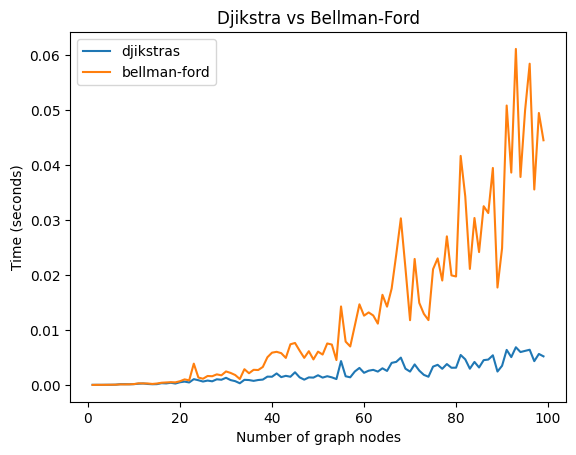

In [41]:
import graph_generators
import time
from matplotlib import pyplot as plt
import numpy as np

djikstra_times = []
belmman_times = []
for n in range(1,100,1):
    if n % 10 == 0:
        print("n = ",n)
    trial_times_d = []
    trial_times_b = []
    for trial in range(10):
        graph = graph_generators.random_weighted_graph(n)

        start = time.perf_counter()
        bellmanford(graph)
        end = time.perf_counter()
        trial_times_b.append(end-start)
        
        start = time.perf_counter()
        djikstras(graph)
        end = time.perf_counter()
        trial_times_d.append(end-start)


    belmman_times.append(np.mean(trial_times_b))
    djikstra_times.append(np.mean(trial_times_d))

fig, ax = plt.subplots()
ax.set_title("Djikstra vs Bellman-Ford")
ax.set_ylabel("Time (seconds)")
ax.set_xlabel("Number of graph nodes")
ax.plot(np.arange(1,100,1),djikstra_times,label = 'djikstras')
ax.plot(np.arange(1,100,1),belmman_times,label = 'bellman-ford')
ax.legend()
plt.show()
        


As expected, djikstra's outperforms bellman-ford.